In [23]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# 311 - Crime Relation

### Importing libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns


%matplotlib inline

### Reading Selected Crime Data (BURGLARY/BREAKING AND ENTERING	MOTOR VEHICLE THEFT	ROBBERY	THEFT FROM MOTOR VEHICLE)

In [30]:
df=pd.read_csv('Police_-_Selected_Criminal_Incidents_tracts.csv',parse_dates=['dtreported'])

### *** census tract infromation added - retrived from Cencus for each record based on lat-lon

### Data Table (rows, columns)

In [36]:
df.shape

(13636, 20)

### Sample Crime Data

In [37]:
df.head()

,incnum,dtreported,stnum,stname1,stname2,loctype,ra,offensecode,offense,X,Y,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,7026331,2007-07-21 00:50:00,XX,15 TENNYSON STREET,NaN,I,NaN,120,ROBBERY,-71.10003,42.39183,25.0,17.0,350200.0,1400000US25017350200,2.501735e+10,3502.00,CT,683707.0,0.0
1,8035903,2008-10-06 09:46:00,XX,422 MYSTIC AVE,NaN,S,35.0,23F,THEFT FROM MOTOR VEHICLE,-71.08901,42.39509,25.0,17.0,350104.0,1400000US25017350104,2.501735e+10,3501.04,CT,917458.0,1616.0
2,5042153,2005-12-24 04:43:00,XX,709 MCGRATH HWY,NaN,NaN,NaN,120,ROBBERY,-71.08673,42.39063,25.0,17.0,350104.0,1400000US25017350104,2.501735e+10,3501.04,CT,917458.0,1616.0
3,8000319,2008-01-03 19:00:00,XX,ABERDEEN RD,NaN,S,97.0,23F,THEFT FROM MOTOR VEHICLE,-71.11355,42.39205,25.0,17.0,351000.0,1400000US25017351000,2.501735e+10,3510.00,CT,668313.0,0.0
4,7017731,2007-05-23 11:33:00,XX,ACADIA PK,NaN,S,NaN,23F,THEFT FROM MOTOR VEHICLE,-71.11692,42.38826,25.0,17.0,351000.0,1400000US25017351000,2.501735e+10,3510.00,CT,668313.0,0.0


### Number of recorded crimes (selected crimes) per year

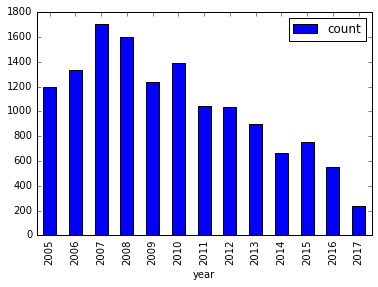

In [39]:
df['count']=1
df['year']=df.dtreported.dt.year
df[['year','count']].groupby('year').count().plot(kind='bar')

### Limiting Data to 2017
### Number of recorded crimes (selected crimes) per month (2017)

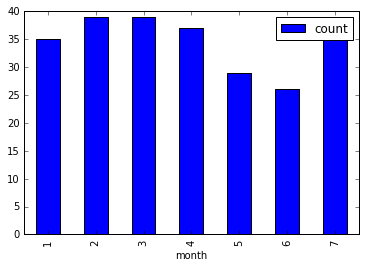

In [41]:
df=df[df['year']==2017]
df['month']=df.dtreported.dt.month
df[['month','count']].groupby('month').count().plot(kind='bar')

### Limiting data to Feb to June 2017

In [44]:
df=df[df.month>2]
df.shape[0]

166

### Agregating Crime Data by week and tract

In [46]:
df['week']=df.dtreported.dt.week
dg=df[['week','TRACTCE','offense','count']].groupby(['week','TRACTCE','offense']).count()
dg=dg.unstack().reset_index()
dg.columns=['Week Number','Tract Number']+list(dg.columns.get_level_values(1)[2:])

In [59]:
dg=dg.fillna(0)
dg['Tract Number']=dg['Tract Number'].astype(int)

### Number of aggregated records

In [61]:
dg.shape[0]

118

### Sample Aggregated Crime Data

In [56]:
dg.head()

,Week Number,Tract Number,BURGLARY/BREAKING AND ENTERING,MOTOR VEHICLE THEFT,ROBBERY,THEFT FROM MOTOR VEHICLE
0,9,350104,1.0,0.0,0.0,1.0
1,9,350300,0.0,2.0,0.0,0.0
2,9,350400,1.0,0.0,0.0,0.0
3,9,351203,0.0,1.0,0.0,0.0
4,9,351403,1.0,0.0,0.0,1.0


### Merging aggregated crime data with aggregated 311 Data

In [58]:
dg_311=pd.read_csv('311_tract_groups.csv')
dg_merged=pd.merge(dg,dg_311 ,  how='left')
dg_merged.head()

,Week Number,Tract Number,BURGLARY/BREAKING AND ENTERING,MOTOR VEHICLE THEFT,ROBBERY,THEFT FROM MOTOR VEHICLE,Abandoned property,ISD-Buildings,Illegal parking,Power outage,Street light issue,TV/monitor pick up
0,9,350104,1.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0
1,9,350300,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,9,350400,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,9,351203,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9,351403,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0


### 311 and Crime Relations (Correlations)

In [63]:
corr=dg_merged[dg_merged.columns[2:]].corr()
corr=corr[corr.columns[0:4]]
corr[4:]

,BURGLARY/BREAKING AND ENTERING,MOTOR VEHICLE THEFT,ROBBERY,THEFT FROM MOTOR VEHICLE
Abandoned property,0.047709,0.026686,0.027538,-0.091098
ISD-Buildings,0.048950,0.130730,0.014779,-0.126216
Illegal parking,0.142665,-0.119636,0.125516,-0.096228
Power outage,NaN,NaN,NaN,NaN
Street light issue,-0.046208,-0.098865,-0.003488,0.067020
TV/monitor pick up,0.058483,0.126066,0.029796,-0.164923


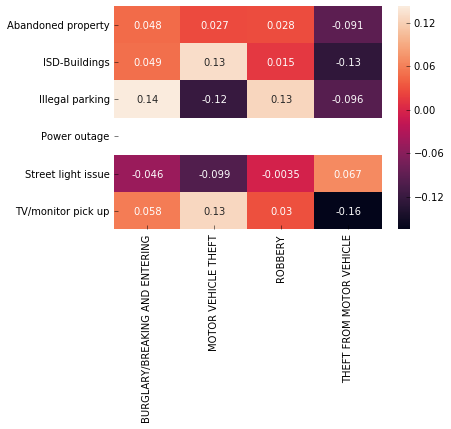

In [66]:
sns.heatmap(corr[4:], 
            xticklabels=corr.columns.values,
            yticklabels=corr[4:].index,annot=True)